# Capstone 1 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import spatial
import capstone1_funcs as cs1
import seaborn as sns
%matplotlib inline

## Import CSV

In [2]:
init_df = pd.read_csv('/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/music2/SpotifyAudioFeaturesApril2019.csv')

In [3]:
init_df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [4]:
init_df.shape

(130663, 17)

## If there are any duplicate songs, they need to be removed

In [5]:
cs1.drop_duplicates(init_df)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


## The format of duration_ms is a bit hard to read.  Passing DF through a ms to second converter

In [6]:
cs1.time_ms_to_sec(init_df)

### There is now a new time_seconds column which is easier to interpret

In [7]:
init_df.head()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),214,0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,125,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,124,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [8]:
init_df.shape

(130663, 17)

## Check the data for any NaN values

In [9]:
cols_list = ['track_id', 'track_name', 'time_seconds', 'acousticness', 'danceability', 
             'energy', 'instrumentalness', 'key', 'liveness', 
             'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
             'valence', 'popularity']

In [10]:
cs1.check_for_nans(init_df, cols_list)

NaNs in track_id: 0
NaNs in track_name: 0
NaNs in time_seconds: 0
NaNs in acousticness: 0
NaNs in danceability: 0
NaNs in energy: 0
NaNs in instrumentalness: 0
NaNs in key: 0
NaNs in liveness: 0
NaNs in loudness: 0
NaNs in mode: 0
NaNs in speechiness: 0
NaNs in tempo: 0
NaNs in time_signature: 0
NaNs in valence: 0
NaNs in popularity: 0


# Drop specific columns

### I will drop the 'instrumentalness, speechiness, time_signature, key, and mode columns

In [11]:
cols_to_drop = ['instrumentalness', 'speechiness', 'time_signature', 'key', 'mode']

In [12]:
cs1.drop_columns(init_df, cols_to_drop)

There are a good amount of one's in the popularity column.  I decided to remove them.  Hard to believe that even the worst song would receive such a low score

In [13]:
mask_above_0 = init_df['popularity'] >2
mask_0 = init_df['popularity'] < 2

In [14]:
df = init_df.copy()[mask_above_0]
df_0 = init_df.copy()[mask_0]

In [15]:
df_0.shape

(22106, 12)

In [16]:
df

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.00582,0.743,0.339,0.0812,-7.678,203.927,0.1180,15
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.02500,0.603,0.723,0.0824,-5.890,114.966,0.3820,56
41,Mr Little Jeans,3Z78Hd9B1OndIo7XJajwYR,Forgetter,254,0.12500,0.821,0.512,0.0879,-7.138,128.035,0.5430,28
42,Orjan Nilsen,16UKw34UY9w40Vc7TOkPpA,Nothing Here But Love,189,0.04480,0.574,0.881,0.0756,-2.150,126.131,0.5510,29
45,Burbank,7AgDITo8BVDoh2bXj2psYA,Waiting for U,168,0.83200,0.699,0.309,0.1160,-10.790,79.991,0.4220,31
...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,190,0.00678,0.601,0.801,0.0991,-5.174,131.049,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,194,0.91800,0.387,0.249,0.1030,-13.233,94.039,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,139,0.33000,0.717,0.532,0.0997,-8.351,156.977,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,180,0.00790,0.772,0.510,0.1310,-9.670,120.049,0.0755,50


## Gain a general understanding of the data and how it's distributed

In [17]:
attribute_list = ['time_seconds', 'acousticness', 'danceability', 
                  'energy', 'liveness', 'loudness', 'tempo', 
                  'valence', 'popularity']

color_list = sns.color_palette()

Mean value for time_seconds: 215.51


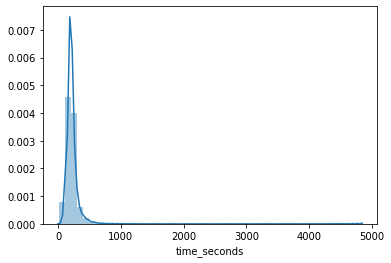

Mean value for acousticness: 0.34


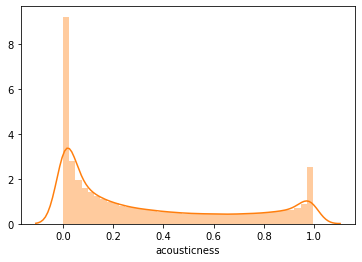

Mean value for danceability: 0.58


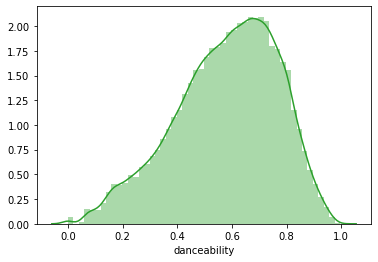

Mean value for energy: 0.57


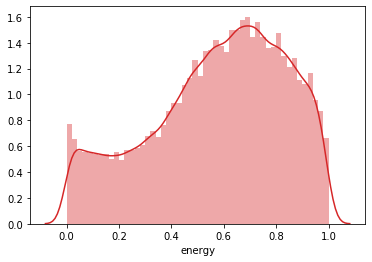

Mean value for liveness: 0.19


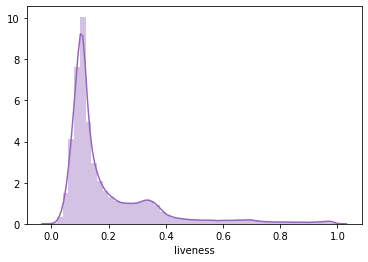

Mean value for loudness: -9.64


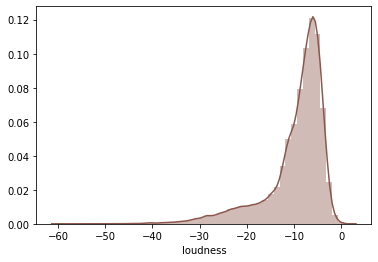

Mean value for tempo: 119.69


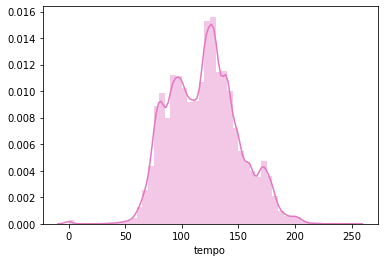

Mean value for valence: 0.44


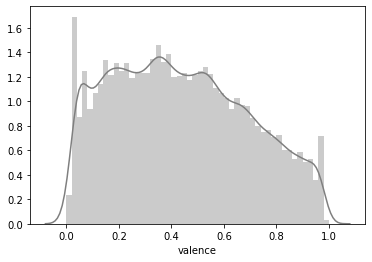

Mean value for popularity: 29.75


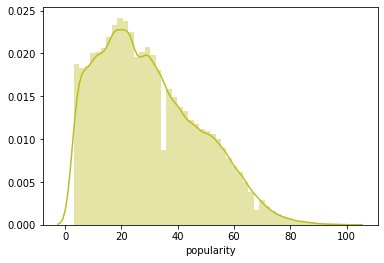

In [18]:
cs1.plot_hists_and_means(df, attribute_list, color_list)

## I wanted to examine the relationship between each attribute through the use of a scatter matrix

In [19]:
# sns.pairplot(df)

## Group together songs by similar popularity rating.

## The songs were grouped into 8 groups.

##### Out of the 106,040 total songs in the dataframe, I decided that the top 0.1% of these could be classified as the most popular of the dataset with a popularity over 86.  The remaining songs were distrubuted fairly evenly between the remaining 7 groups.

In [20]:
popularity = df.copy().sort_values('popularity', ascending=False)

In [21]:
popularity.tail()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
100453,Sushin Shyam,39Y9HLrqt5NDNtBxLtFKRL,Mutta Paatu (The Egg Song),221,0.1360,0.767,0.739,0.152,-5.517,134.008,0.959,3
119894,Cedric Gervais,757HmSWk7OZEUA8LU101Vm,Do It Tonight (AIR238),120,0.0185,0.537,0.971,0.117,-3.636,127.945,0.233,3
112535,Johann Sebastian Bach,2PrLmcL5GW9l1mPo9zCbbG,"Auf, auf! Die rechte Zeit ist hier, BWV 440",88,0.9250,0.367,0.249,0.127,-12.245,89.171,0.205,3
21837,ABC,3ewkw3uTTBRpSUaqJlyPDa,A dorso d'asino,220,0.4370,0.569,0.445,0.132,-12.545,126.849,0.513,3
60596,Luis y Julian,7DZAIR8ZaYzUA2PwRGQhyb,Condena Dictada,210,0.5860,0.472,0.472,0.052,-2.700,182.855,0.797,3


In [22]:
df.shape

(106040, 12)

## Create masks to separate popularity into new dfs.  Separated as follows:
- Greater than 86
- Between 52 and 87
- Between 41 and 52
- Between 33 and 41
- Between 26 and 33
- Between 20 and 26
- Between 14 and 20
- Between 7 and 14
- Between 1 and 7

Besides the greater than 87 group, each group holds around 13,000 songs now.  This will make it easier to analyze later.

### Create masks for each new group

In [23]:
mask_86 = popularity['popularity'] > 86
mask_52 = (popularity['popularity'] > 52) & (popularity['popularity'] <= 86)
mask_41 = (popularity['popularity'] > 41) & (popularity['popularity'] <= 52)
mask_33 = (popularity['popularity'] > 33) & (popularity['popularity'] <= 41)
mask_26 = (popularity['popularity'] > 26) & (popularity['popularity'] <= 33)
mask_20 = (popularity['popularity'] > 20) & (popularity['popularity'] <= 26)
mask_14 = (popularity['popularity'] > 14) & (popularity['popularity'] <= 20)
mask_7 = (popularity['popularity'] > 7) & (popularity['popularity'] <= 14)
mask_1 = (popularity['popularity'] > 1) & (popularity['popularity'] <= 7)

mask_below_86 = (popularity['popularity'] <= 86) & (popularity['popularity'] > 1)



### Apply masks to create new dataframes to work with

In [24]:
df_86 = popularity[mask_86]
df_52 = popularity[mask_52]
df_41 = popularity[mask_41]
df_33 = popularity[mask_33]
df_26 = popularity[mask_26]
df_20 = popularity[mask_20]
df_14 = popularity[mask_14]
df_7 = popularity[mask_7]
df_1 = popularity[mask_1]

df_below_86 = popularity[mask_below_86]



### mask_86 is about 0.13% of the total data

In [25]:
f'{round(((len(df_86) / len(df)) * 100), 3)} %'

'0.13 %'

### New dataframe totals and percents of total data

In [26]:
df_lst = [df_86, df_52, df_41, df_33, df_26, df_20, df_14, df_7, df_1]
df_name_lst = ['df_86', 'df_52', 'df_41', 'df_33', 'df_26', 'df_20', 'df_14', 'df_7', 'df_1']

for df_, name in zip(df_lst, df_name_lst):
    print(f'{name}: \t Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 111774)*100, 2)}%\n')

df_86: 	 Songs:138 
	 Percent:0.12%

df_52: 	 Songs:13680 
	 Percent:12.24%

df_41: 	 Songs:13267 
	 Percent:11.87%

df_33: 	 Songs:12794 
	 Percent:11.45%

df_26: 	 Songs:14363 
	 Percent:12.85%

df_20: 	 Songs:13562 
	 Percent:12.13%

df_14: 	 Songs:14268 
	 Percent:12.77%

df_7: 	 Songs:14447 
	 Percent:12.93%

df_1: 	 Songs:9521 
	 Percent:8.52%



## Compare distributions from each df across all attributes

#### Time, Acousticness, Danceability, Energy, Liveness, Loudness, Tempo, and Valence

### Time

df_86 Mean:203.7173913043478. St. Dev:40.679195467945824
df_52 Mean:202.23040935672515. St. Dev:55.04394692257138
df_41 Mean:208.6192055475993. St. Dev:67.878614532698
df_33 Mean:214.7142410504924. St. Dev:99.47591653145683
df_26 Mean:219.58044976676183. St. Dev:150.27139869831305
df_20 Mean:215.8673499483852. St. Dev:114.68383742350885
df_14 Mean:225.43467900196242. St. Dev:143.61552146890824
df_7 Mean:220.25693915691838. St. Dev:134.9026321694751
df_1 Mean:216.72660434828273. St. Dev:136.3168643517081


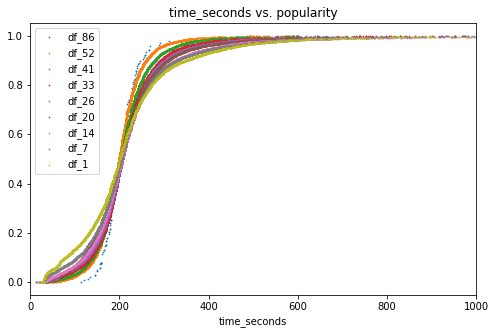

In [40]:
attribute = 'time_seconds'
plt.figure(figsize=(8, 5))
plt.xlim(0, 1000)
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Acousticness

df_86 Mean:0.2849859420289854. St. Dev:0.24995547728657977
df_52 Mean:0.2882829125942997. St. Dev:0.2988544240156071
df_41 Mean:0.2747309047222429. St. Dev:0.2929523962343578
df_33 Mean:0.29684131169141886. St. Dev:0.3126746830648747
df_26 Mean:0.31395294869456314. St. Dev:0.3289250975566179
df_20 Mean:0.35342269485916367. St. Dev:0.35170073337366337
df_14 Mean:0.3675804031118579. St. Dev:0.3689332319401906
df_7 Mean:0.3742645754765677. St. Dev:0.3703354499550583
df_1 Mean:0.456447030076672. St. Dev:0.3907239026758321


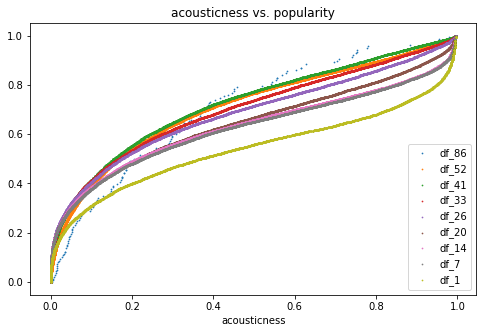

In [41]:
attribute = 'acousticness'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Danceability

df_86 Mean:0.7273550724637681. St. Dev:0.12763403302925747
df_52 Mean:0.6435776535087688. St. Dev:0.16240504459571883
df_41 Mean:0.6226327428959091. St. Dev:0.1644510397977973
df_33 Mean:0.5932937939659239. St. Dev:0.17545674209966688
df_26 Mean:0.5802804636914305. St. Dev:0.18105300313298747
df_20 Mean:0.5621125866391385. St. Dev:0.19198715422372337
df_14 Mean:0.548022631062518. St. Dev:0.19617285231976983
df_7 Mean:0.5466348307607141. St. Dev:0.19467753134568758
df_1 Mean:0.5329036340720502. St. Dev:0.2004519471826614


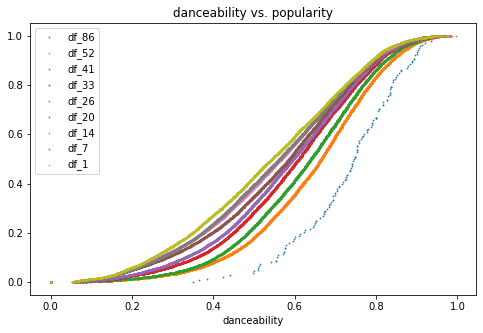

In [42]:
attribute = 'danceability'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Energy

df_86 Mean:0.5932311594202896. St. Dev:0.17202258522122021
df_52 Mean:0.6040733289693012. St. Dev:0.21924300227494856
df_41 Mean:0.6194082931408753. St. Dev:0.21852376186553016
df_33 Mean:0.6145484241441312. St. Dev:0.23553333543388316
df_26 Mean:0.602776511390379. St. Dev:0.24991210522628637
df_20 Mean:0.5641106036867743. St. Dev:0.26924759925329994
df_14 Mean:0.5478665832492262. St. Dev:0.2792566321629219
df_7 Mean:0.5386938132484281. St. Dev:0.27935419782929327
df_1 Mean:0.48565051399012554. St. Dev:0.2832479002281388


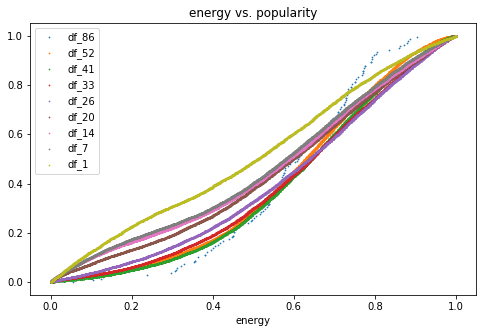

In [43]:
attribute = 'energy'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Liveness

df_86 Mean:0.176045652173913. St. Dev:0.12401545609584971
df_52 Mean:0.17568071637426988. St. Dev:0.13859341761924063
df_41 Mean:0.18688336473958048. St. Dev:0.15483367159486353
df_33 Mean:0.19534894481788379. St. Dev:0.16919393483243772
df_26 Mean:0.20387801991227614. St. Dev:0.18514856974787353
df_20 Mean:0.20259323108686111. St. Dev:0.17774194055963588
df_14 Mean:0.19768305999439437. St. Dev:0.16796617643639034
df_7 Mean:0.19956548072264194. St. Dev:0.16683685152156194
df_1 Mean:0.19836671568112688. St. Dev:0.17165087642662097


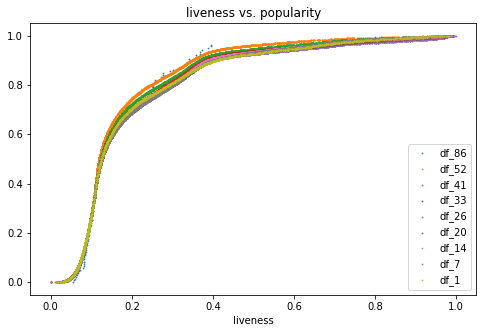

In [44]:
attribute = 'liveness'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Loudness

df_86 Mean:-6.667420289855075. St. Dev:3.218062043545783
df_52 Mean:-7.491958625730989. St. Dev:4.419324981950884
df_41 Mean:-7.679410190698721. St. Dev:4.145864063336875
df_33 Mean:-8.350325777708317. St. Dev:5.079570215145399
df_26 Mean:-8.95099540485971. St. Dev:5.509726139598711
df_20 Mean:-10.340168632944991. St. Dev:6.915598804816531
df_14 Mean:-10.936477992710929. St. Dev:7.398791609895608
df_7 Mean:-11.368647193188886. St. Dev:7.284587611142489
df_1 Mean:-12.668804642369503. St. Dev:7.446693860528661


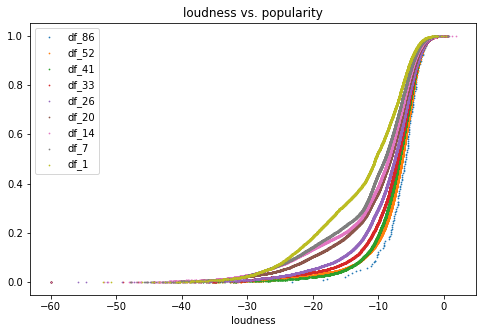

In [61]:
attribute = 'loudness'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Tempo

df_86 Mean:117.83695652173915. St. Dev:28.21759673588157
df_52 Mean:120.81150950292344. St. Dev:29.88767064027431
df_41 Mean:120.97822295922208. St. Dev:29.338191085613317
df_33 Mean:121.43161067687993. St. Dev:29.624363918687333
df_26 Mean:120.31279008563604. St. Dev:29.9740973134967
df_20 Mean:119.00038187582949. St. Dev:30.427976590765066
df_14 Mean:118.95526997476864. St. Dev:30.66717925496458
df_7 Mean:118.579112895411. St. Dev:30.056222151489976
df_1 Mean:116.83364615061416. St. Dev:30.390571121334006


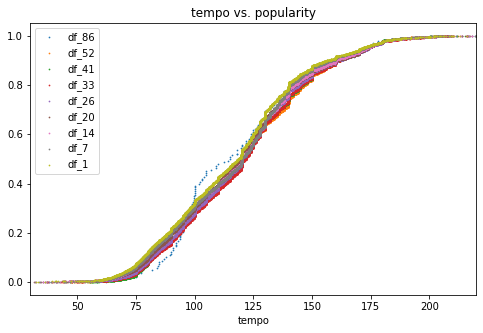

In [48]:
attribute = 'tempo'
plt.figure(figsize=(8, 5))
plt.xlim(30, 220)
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

### Valence

df_86 Mean:0.46704057971014473. St. Dev:0.2049069840718053
df_52 Mean:0.4551001323099428. St. Dev:0.2307582921477481
df_41 Mean:0.4522393736338272. St. Dev:0.23760653206999977
df_33 Mean:0.4393206617945901. St. Dev:0.24726635479464673
df_26 Mean:0.43841235180672183. St. Dev:0.2588543268606722
df_20 Mean:0.4361564430025055. St. Dev:0.26627536940252394
df_14 Mean:0.40931723857583324. St. Dev:0.26221815466197007
df_7 Mean:0.4212330110057439. St. Dev:0.26570730558013
df_1 Mean:0.43295066400588383. St. Dev:0.2691518963721163


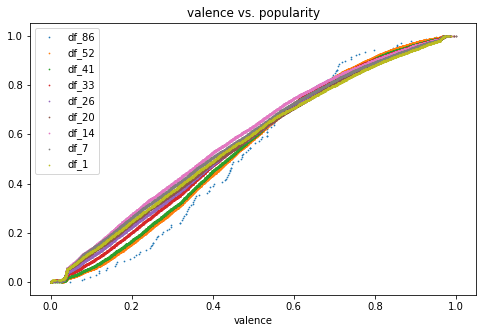

In [47]:
attribute = 'valence'
plt.figure(figsize=(8, 5))
cs1.scatter_cdf(df_lst, attribute, color_list, df_name_lst)

## The attribute that drew my attention first was loudness.

### I am curious how loudness relates to a track's popularity

Mean value for loudness in df_86: -6.67


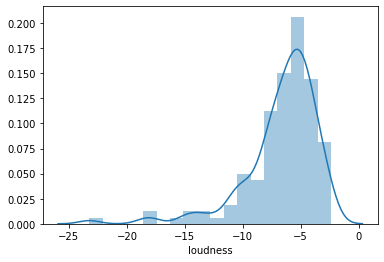

Mean value for loudness in df_52: -7.49


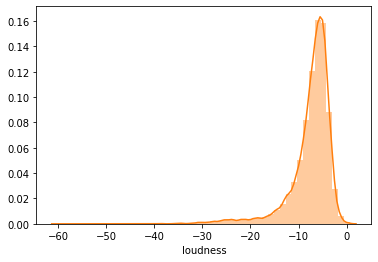

Mean value for loudness in df_41: -7.68


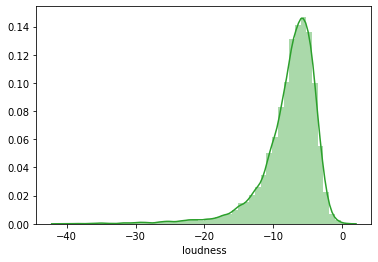

Mean value for loudness in df_33: -8.35


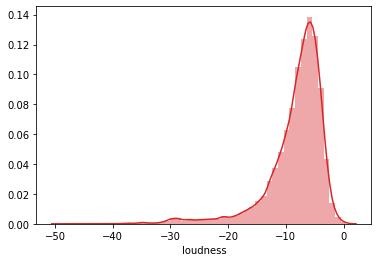

Mean value for loudness in df_26: -8.95


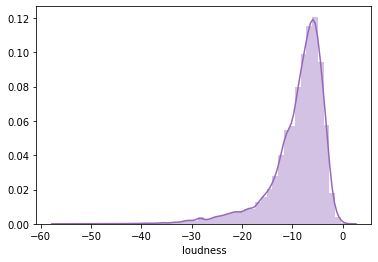

Mean value for loudness in df_20: -10.34


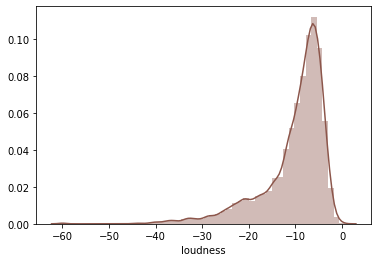

Mean value for loudness in df_14: -10.94


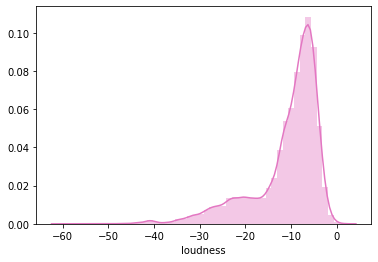

Mean value for loudness in df_7: -11.37


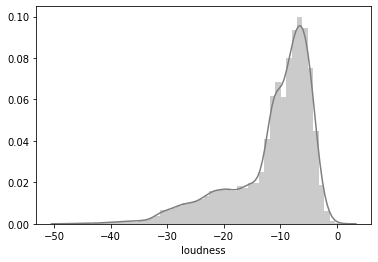

Mean value for loudness in df_1: -12.67


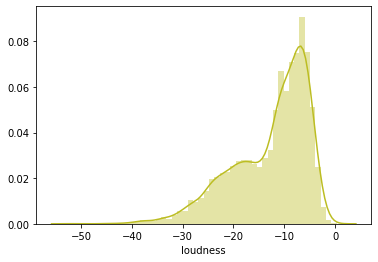

In [26]:
attribute = 'loudness'
cs1.plot_hists_attribute(df_lst, attribute, color_list, df_name_lst)

''

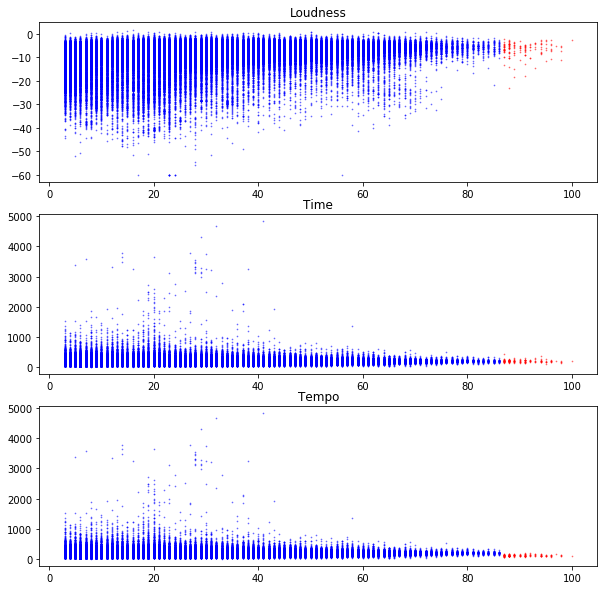

In [30]:
fig, ax = plt.subplots(3, figsize=(10, 10))

ax[0].scatter(df_86['popularity'], df_86['loudness'], s=0.5, color='red', alpha=0.5)
ax[0].scatter(df_below_86['popularity'], df_below_86['loudness'], s=0.5, color='blue', alpha=0.5)
ax[0].set_title('Loudness')

ax[1].scatter(df_86['popularity'], df_86['time_seconds'], s=0.5, color='red', alpha=0.5)
ax[1].scatter(df_below_86['popularity'], df_below_86['time_seconds'], s=0.5, color='blue', alpha=0.5)
ax[1].set_title('Time')

ax[2].scatter(df_86['popularity'], df_86['tempo'], s=0.5, color='red', alpha=0.5)
ax[2].scatter(df_below_86['popularity'], df_below_86['time_seconds'], s=0.5, color='blue', alpha=0.5)
ax[2].set_title('Tempo')


;

### Spearman Correlation tests.  Song attributes against popularity

alpha value of 0.05
Running 8 test.  Significance at 0.05/8 = 0.00625

In [65]:
corr_list = ['time_seconds', 'acousticness', 'danceability', 
                  'energy', 'liveness', 'loudness', 'tempo', 
                  'valence']

In [78]:
def spearman_correlation(frame, col1, col2):
    a, b = frame[col1], frame[col2]
    correlation, pvalue = stats.spearmanr(a, b)
    print(f'{col1} and {col2} have a correlation of {round(correlation, 3)}, with a p-value of {pvalue}') 

In [79]:
for att in corr_list:
    spearman_correlation(df, att, 'popularity') 

time_seconds and popularity have a correlation of -0.009, with a p-value of 0.0055977699952641236
acousticness and popularity have a correlation of -0.099, with a p-value of 1.2290236449990221e-228
danceability and popularity have a correlation of 0.183, with a p-value of 0.0
energy and popularity have a correlation of 0.123, with a p-value of 0.0
liveness and popularity have a correlation of -0.024, with a p-value of 4.101749967807702e-15
loudness and popularity have a correlation of 0.263, with a p-value of 0.0
tempo and popularity have a correlation of 0.038, with a p-value of 2.185627825374629e-35
valence and popularity have a correlation of 0.056, with a p-value of 2.658326249179174e-73


### Conclusion
- Loudness-
    - Correlation of 0.263, with a p-value of 0.0. 
    - As a song gets louder than its popularity will go up.
- Danceability-
    - has a correlation of 0.183, with a p-value of 0.0. As a song's danceability value increases than its popularity will go up.
- Energy has a correlation of 0.123, with a p-value of 0.0. As a song's energy increases than its popularity will go up.
- Tempo has a correlation of 0.038, with a p-value of 2.185627825374629e-35. As a song's tempo increases than its popularity will go up.
- Valence has a correlation of 0.056, with a p-value of 2.658326249179174e-73. As a song's valence increases than its popularity will go up.
- Time has a correlation of -0.009, with a p-value of 0.0055977699952641236. As a song's length increases than its popularity will go down.
- Liveness has a correlation of -0.024, with a p-value of 4.101749967807702e-15. As a song's sense of liveness increases than its popularity will go down.
- Acousticness has a correlation of -0.099, with a p-value of 1.2290236449990221e-228. As a song's acousticness value increases than its popularity will go down.

In [44]:
frame = df
col1 = 'popularity'
col2 = 'loudness'

spearman_correlation(frame, col1, col2)

popularity and loudness have a correlation of 0.2633959521782094, with a p-value of 0.0
